In [135]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 

In [136]:
df=pd.read_csv("UpdatedResumeDataSet.csv")
df.sample(10)

,Category,Resume
841,DotNet Developer,Education Details \r\nJanuary 2014 Education ...
817,ETL Developer,SKILL SET â Talend Big Data â Informatica ...
670,Network Security Engineer,Skill Set â¢â¢Cisco Certified Network Associ...
81,HR,Training in Special Education (Certificate Cou...
639,DevOps Engineer,Skills VISA B1-VISA (USA) Onsite Visits to Swe...
734,Database,"SKILLSET Oracle DBA, MySQL, MARIADB, PostgreSQ..."
37,Data Science,Education Details \r\n B.Tech Rayat and Bahr...
588,Python Developer,Education Details \r\nJune 2013 to June 2016 D...
233,Sales,IT Skills: MS Office. Photoshop. SQL Server.Ed...
42,HR,Education Details \r\n BA mumbai University\...


In [137]:
df.shape

(962, 2)

In [138]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

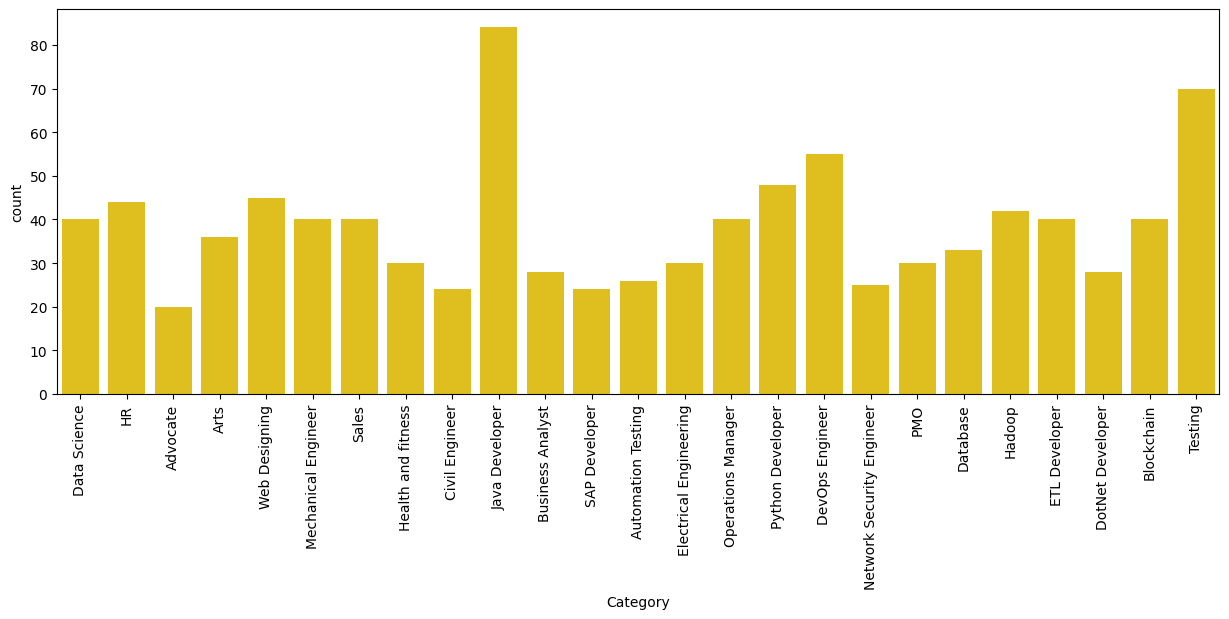

In [139]:
plt.figure(figsize=(15, 5))
sns.set_palette("hsv")  # Set the color palette

ax = sns.countplot(data=df, x='Category')
plt.xticks(rotation=90)
plt.show()

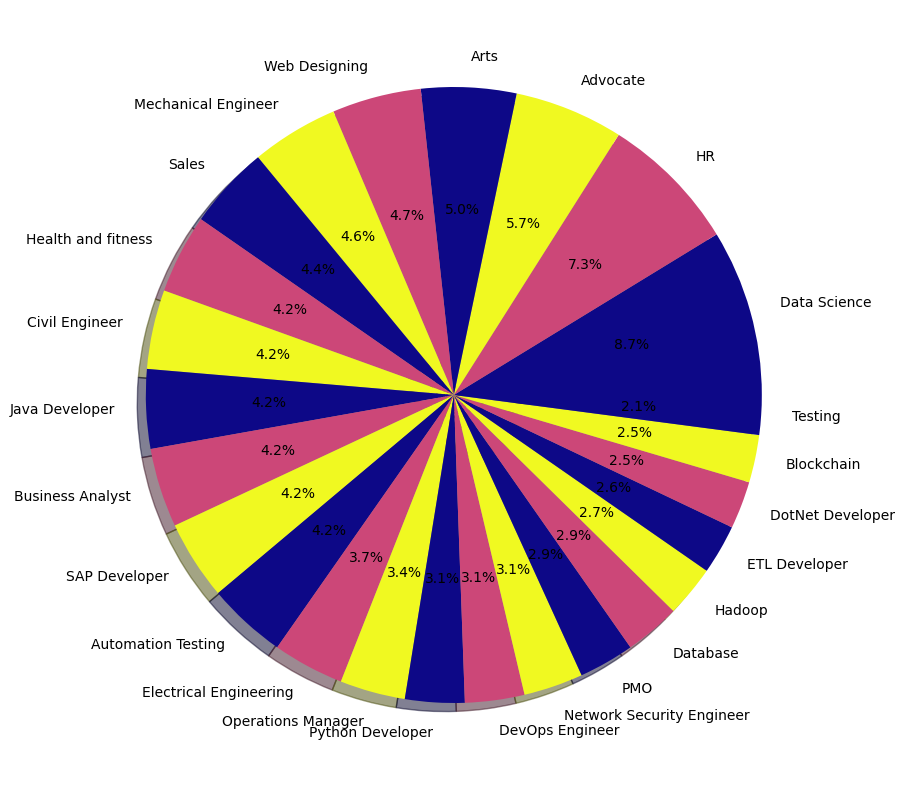

In [140]:
counts=df['Category'].value_counts()
labels=df['Category'].unique()
plt.figure(figsize=(15,10))
plt.pie(counts,labels=labels,autopct="%1.1f%%",shadow=True,colors=plt.cm.plasma(np.linspace(0,1,3)))
plt.show()

# Exploring Resume

In [141]:
df['Resume'][90]

'Skills: Natural Languages: Proficient in English, Hindi and Marathi. Computer skills: Proficient with MS-Office, Internet operation.Education Details \r\nJanuary 2015 to January 2018 LLB Law Mumbai, Maharashtra Mumbai university\r\nJanuary 2015 B.M.M  Mumbai, Maharashtra S.K.Somaiya College, Mumbai University\r\n H.S.C   Asmita Girls junior College, Maharashtra Board\r\n S.S.C Vidya Bhawan  Maharashtra Board\r\nAdvocate \r\n\r\nLlb student and Journalist\r\nSkill Details \r\nCompany Details \r\ncompany - Criminal lawyer (law firm)\r\ndescription - '

# Cleaning Data


In [142]:
import re

def cleanResume(txt):
    cleanTxt = re.sub(r'http\S+\s', ' ', txt)                    
    cleanTxt = re.sub(r'RT|cc', ' ', cleanTxt)                   
    cleanTxt = re.sub(r'@\S+', ' ', cleanTxt)                    
    cleanTxt = re.sub(r'#\S+\s', ' ', cleanTxt)                  
    cleanTxt = re.sub(r'[%s]' % re.escape(r"""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanTxt)  
    cleanTxt = re.sub(r'[^\x00-\x7f]', ' ', cleanTxt)            
    cleanTxt = re.sub(r'\s+', ' ', cleanTxt)                     
    return cleanTxt                                              


In [143]:
df['Resume']=df['Resume'].apply(lambda x:cleanResume(x))

In [144]:
df['Resume']

0      Skills Programming Languages Python pandas num...
1      Education Details May 2013 to May 2017 B E UIT...
2      Areas of Interest Deep Learning Control System...
3      Skills R Python SAP HANA Tableau SAP HANA SQL ...
4      Education Details MCA YMCAUST Faridabad Haryan...
                             ...                        
957    Computer Skills Proficient in MS office Word B...
958     Willingness to a ept the challenges Positive ...
959    PERSONAL SKILLS Quick learner Eagerness to lea...
960    COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...
961    Skill Set OS Windows XP 7 8 8 1 10 Database MY...
Name: Resume, Length: 962, dtype: object

# words into categorical values

In [145]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [146]:
le.fit(df['Category'])
df['Category']=le.transform(df['Category'])

In [147]:
df['Category'].unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [148]:
"""array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)"""

"array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',\n       'Mechanical Engineer', 'Sales', 'Health and fitness',\n       'Civil Engineer', 'Java Developer', 'Business Analyst',\n       'SAP Developer', 'Automation Testing', 'Electrical Engineering',\n       'Operations Manager', 'Python Developer', 'DevOps Engineer',\n       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',\n       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],\n      dtype=object)"

# Vectorization

In [149]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(stop_words='english')

tfidf.fit(df['Resume'])
reqTxt =tfidf.transform(df['Resume'])

# Splitting

In [150]:
from sklearn.model_selection import train_test_split


In [151]:
X_train,X_test,y_train,y_test=train_test_split(reqTxt,df['Category'],test_size=0.2,random_state=42)

In [152]:
X_train.shape

(769, 7351)

# Training the model

In [153]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
clf=OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
#print(y_pred)
print("accuracy:",accuracy_score(y_test,y_pred))

accuracy: 0.9844559585492227


# Checking whether model is overfiting or not 

In [154]:
# Calculate training accuracy
train_accuracy = accuracy_score(y_train, clf.predict(X_train))

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, clf.predict(X_test))

print("Training accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)

Training accuracy: 0.9856957087126138
Test accuracy: 0.9844559585492227


In [155]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(clf, X_train, y_train, cv=10)

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())


Cross-validation scores: [0.97402597 1.         0.97402597 0.94805195 0.96103896 0.97402597
 0.96103896 0.98701299 0.92207792 0.98684211]
Mean cross-validation score: 0.9688140806561858


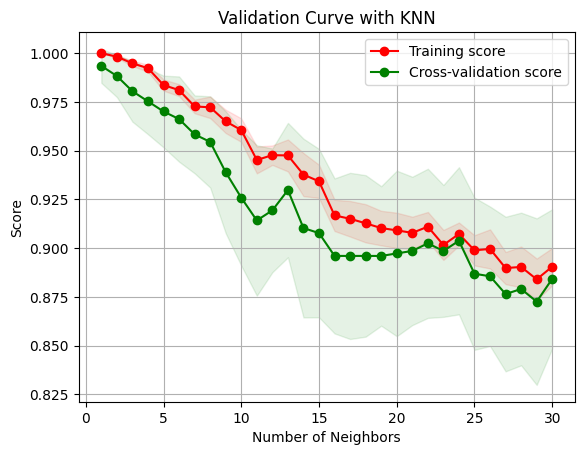

In [156]:
from sklearn.model_selection import validation_curve

# Example with k parameter of KNeighborsClassifier
param_range = range(1, 31)
train_scores, test_scores = validation_curve(KNeighborsClassifier(), X_train, y_train, param_name="n_neighbors", param_range=param_range, cv=10, scoring="accuracy")

# Calculate mean and standard deviation for training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot validation curve
plt.figure()
plt.title("Validation Curve with KNN")
plt.xlabel("Number of Neighbors")
plt.ylabel("Score")
plt.grid()

# Plot the average training and test score lines at each parameter value
plt.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(param_range, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(param_range, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(param_range, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()


In [157]:
import pickle
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(clf,open('clf.pkl','wb'))

In [158]:
my_resume="""ABOUT ME
I am a third-year software engineering student with a passion for Artificial Intelligence. I have gained proficiency
in Python and have experience working on AI and ML projects. Additionally, I am proficient in Java and C++. I am
seeking an internship opportunity to gain industry-level experience and improve my technical and interpersonal
skills. I am a quick learner, detail-oriented, and have strong problem-solving skills. I am eager to contribute to a
team and grow as a professional in the field of Artificial Intelligence.
EDUCATION AND TRAINING
Bachelor in Software Engineering 
Mehran University of Engineering and Technology [ 09/2021 – Current ] 
City: Jamshoro | Country: Pakistan 
WORK EXPERIENCE
Data analyst intern at NayaPay 
[ 25/05/2023 – 25/06/2023 ] 
City: Karachi | Country: Pakistan 
• Cleaned and transformed raw datasets into structured formats for further analysis.
• Developed Python scripts to automate Excel tasks, streamlining workflow efficiency and reducing manual
workload.
• Developed SQL queries to automate Python and Excel processes, enhancing data integration and workflow
automation.
• Designed automated reporting processes utilizing SQL queries and Excel macros for streamlined data
analysis.
• Utilized Python-Streamlit for data visualization, creating interactive and insightful visualizations for enhanced
data analysis.
DIGITAL SKILLS 
Java / C++ / Python / Visual Studio/ Visual Studio Code / Git / Linux / MYSQL / Scikitlearn / Pandas /
numpy / matplotlib / Keras / Tensorflow / opencv image processing / Machine Learning, NLP 
PROJECTS 
Facial Expression Recognition 
• Developed a facial expression recognition system using OpenCV and deep learning techniques.
• Trained a CNN model to accurately classify facial expressions such as happiness, sadness, anger, etc.
• Implemented real-time emotion detection capabilities, showcasing skills in computer vision and deep
learning applications.
Sumair Ali 
 Phone number: (+92) 3093490407  Email address: sumairalishahani1@gmail.com
 LinkedIn: https://www.linkedin.com/in/sumairalishahani/  Website: github.com/sumairalishahani
 Home: 199 D Block 2, PECHS, 75100 Karachi (Pakistan) 
Fake News Classifier Using LSTM 
• Developed a deep learning model using LSTM (Long Short-Term Memory) neural networks to classify news
articles as fake or real.
• Implemented natural language processing (NLP) techniques for text preprocessing and feature extraction.
• Achieved accuracy of 90% + in classifying fake news, demonstrating strong proficiency in deep learning and
NLP.
Customer Churn Prediction 
• Built a machine learning model using Python's Scikit-Learn to predict customer churn for a telecom
company.
• Preprocessed and analyzed customer data to identify churn indicators and improve model performance.
• Implemented strategies to reduce customer churn based on predictive insights, demonstrating actionable
data-driven solutions.
LANGUAGE SKILLS 
Mother tongue(s): Sindhi 
Other language(s): Urdu | English 
HOBBIES AND INTERESTS 
Playing cricket ,E-Sports games,Watching Historic Series 
• Participate in cricket matches, honing strategic thinking, teamwork, and decision-making skills.
• Analyze game data and performance metrics to optimize gameplay and achieve desired outcomes.
• Explore historical series and documentaries, fostering a passion for research, analysis, and storytelling."""

In [159]:
clf=pickle.load(open('clf.pkl','rb'))

cleaned_resume=cleanResume(my_resume)

input_feature=tfidf.transform([cleaned_resume])

prediction_id=clf.predict(input_feature)[0]

category_mapping={
    15:"Java Developer",
    23:"Testing",
    8: "DevOps Engineer",
    20:"Python Developer",
    24:"Web Designing",
    12:"HR",    
    13:"Hadoop",
    3: "Blockchain",   
    10: "ETL Developer",
    18: "Operations Manager",   
    6:  "Data Science",
    22: "Sales",      
    16: "Mechanical Engineer",
    1:  "Arts",
    7:  "Database",
    11: "Electrical Engineer",
    14: "Health and fitness",               
    19: "PMO",   
    4:  "Business Analyst",  
    9:  "DotNet Developer",  
    2:  "Automation Testing",  
    17: "Network Security Engineer",
    21: "SAP Developer",   
    5:  "Civil Engineer",  
    0:  "Advocate"                          
}
category_name=category_mapping.get(prediction_id,"Unknown")
print("prediction category:",category_name)
print(prediction_id)

prediction category: Data Science
6
